<a href="https://colab.research.google.com/github/abdullx4/23S23938/blob/main/TigerCheetah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [26]:
# List files and folders in the current directory
print(os.listdir('/content'))

['.config', 'tiger', '.ipynb_checkpoints', 'sample_data', 'cheetah']


In [27]:
# Check the contents of 'tiger' and 'cheetah' folders
print("Tiger Images:", os.listdir('/content/tiger'))
print("Cheetah Images:", os.listdir('/content/cheetah'))


Tiger Images: ['tiger_165_resized.jpg', 'tiger_802_resized.jpg', 'tiger_267_resized.jpg', 'tiger_571_resized.jpg', 'tiger_615_resized.jpg', 'tiger_073_resized.jpg', 'tiger_014_resized.jpg', 'tiger_370_resized.jpg', 'tiger_298_resized.jpg', 'tiger_183_resized.jpg', 'tiger_414_resized.jpg', 'tiger_409_resized.jpg', 'tiger_339_resized.jpg', 'tiger_386_resized.jpg', 'tiger_061_resized.jpg', 'tiger_030_resized.jpg', 'tiger_301_resized.jpg', 'tiger_426_resized.jpg', 'tiger_300_resized.jpg', 'tiger_217_resized.jpg', 'tiger_204_resized.jpg', 'tiger_394_resized.jpg', 'tiger_039_resized.jpg', 'tiger_168_resized.jpg', 'tiger_048_resized.jpg', 'tiger_274_resized.jpg', 'tiger_357_resized.jpg', 'tiger_201_resized.jpg', 'tiger_227_resized.jpg', 'tiger_176_resized.jpg', 'tiger_242_resized.jpg', 'tiger_007_resized.jpg', 'tiger_323_resized.jpg', 'tiger_311_resized.jpg', 'tiger_153_resized.jpg', 'tiger_071_resized.jpg', 'tiger_232_resized.jpg', 'tiger_341_resized.jpg', 'tiger_169_resized.jpg', 'tiger_373

In [28]:
# Function to preprocess images
def load_images_from_folder(folder, label, img_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)  # Read the image
            img = cv2.resize(img, img_size)  # Resize to uniform size
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            images.append(img.flatten())  # Flatten image to 1D array
            labels.append(label)  # Assign the corresponding label
    return images, labels

In [29]:
# Load tiger and cheetah images
tiger_folder = '/content/tiger'
cheetah_folder = '/content/cheetah'

In [30]:
tiger_images, tiger_labels = load_images_from_folder(tiger_folder, label=0)
cheetah_images, cheetah_labels = load_images_from_folder(cheetah_folder, label=1)


In [32]:
# Combine datasets
X = np.array(tiger_images + cheetah_images)  # Features (flattened image pixels)
y = np.array(tiger_labels + cheetah_labels)  # Labels (0 for tiger, 1 for cheetah)

print("Data shape:", X.shape)
print("Labels shape:", y.shape)

Data shape: (942, 4096)
Labels shape: (942,)


In [33]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Helper function to calculate Sensitivity and Specificity
def calculate_sensitivity_specificity(cm):
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

In [35]:
# Helper function to plot ROC Curve
def plot_roc_curve(y_test, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()


In [36]:
# Visualization of Confusion Matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tiger', 'Cheetah'], yticklabels=['Tiger', 'Cheetah'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [37]:
### Decision Tree Implementation
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [38]:
# Predictions and probabilities
y_pred_dt = dt_model.predict(X_test)
y_scores_dt = dt_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


In [39]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:\n", cm_dt)

Decision Tree Confusion Matrix:
 [[49 40]
 [44 56]]


In [40]:
# Sensitivity and Specificity
sensitivity_dt, specificity_dt = calculate_sensitivity_specificity(cm_dt)
print(f"Decision Tree Sensitivity: {sensitivity_dt:.2f}, Specificity: {specificity_dt:.2f}")


Decision Tree Sensitivity: 0.56, Specificity: 0.55


In [41]:
# Classification Report
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.55      0.54        89
           1       0.58      0.56      0.57       100

    accuracy                           0.56       189
   macro avg       0.56      0.56      0.55       189
weighted avg       0.56      0.56      0.56       189



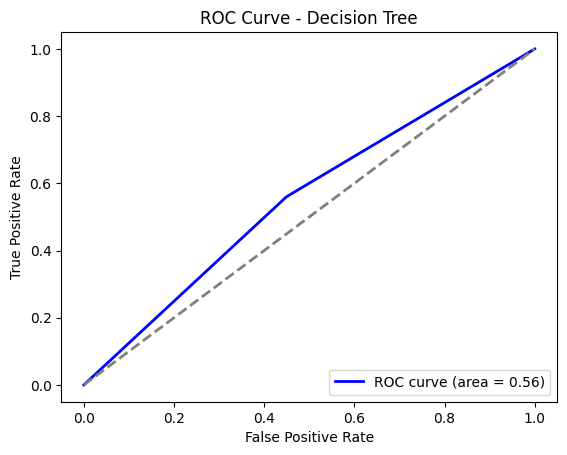

In [42]:
# Plot ROC Curve
plot_roc_curve(y_test, y_scores_dt, "Decision Tree")


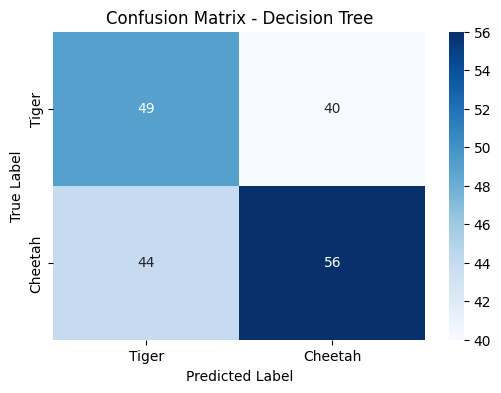

In [43]:
# Plot confusion matrix
plot_confusion_matrix(cm_dt, "Decision Tree")


In [44]:
### k-Nearest Neighbor Implementation
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [45]:
# Predictions and probabilities
y_pred_knn = knn_model.predict(X_test)
y_scores_knn = knn_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


In [46]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("k-NN Confusion Matrix:\n", cm_knn)


k-NN Confusion Matrix:
 [[ 9 80]
 [ 4 96]]


In [47]:
# Sensitivity and Specificity
sensitivity_knn, specificity_knn = calculate_sensitivity_specificity(cm_knn)
print(f"k-NN Sensitivity: {sensitivity_knn:.2f}, Specificity: {specificity_knn:.2f}")


k-NN Sensitivity: 0.96, Specificity: 0.10


In [48]:
# Classification Report
print("k-NN Classification Report:\n", classification_report(y_test, y_pred_knn))


k-NN Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.10      0.18        89
           1       0.55      0.96      0.70       100

    accuracy                           0.56       189
   macro avg       0.62      0.53      0.44       189
weighted avg       0.61      0.56      0.45       189



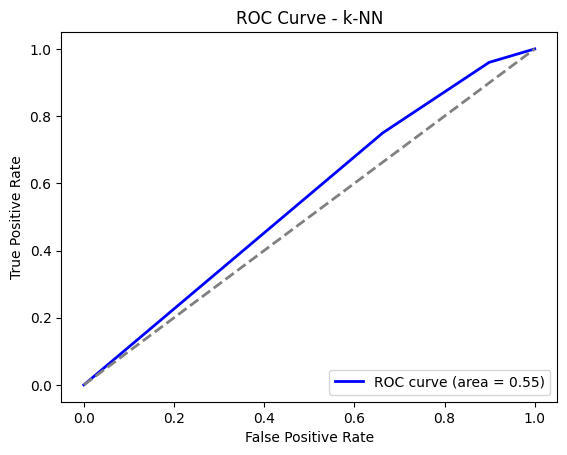

In [49]:
# Plot ROC Curve
plot_roc_curve(y_test, y_scores_knn, "k-NN")


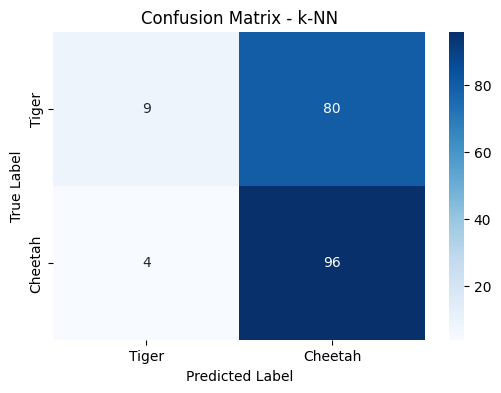

In [50]:
# Plot confusion matrix
plot_confusion_matrix(cm_knn, "k-NN")


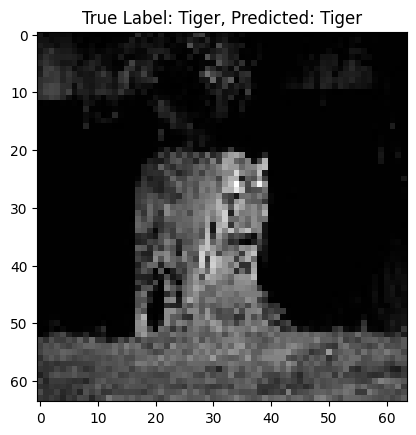

In [51]:
# Visualize a sample test image and prediction
idx = 0  # Index of the sample
plt.imshow(X_test[idx].reshape(64, 64), cmap='gray')  # Reshape to 64x64
plt.title(f"True Label: {'Tiger' if y_test[idx] == 0 else 'Cheetah'}, Predicted: {'Tiger' if y_pred_knn[idx] == 0 else 'Cheetah'}")
plt.show()